## Face and Facial Keypoint detection

1. Detect all the faces in an image using a face detector. (we'll be using a Haar Cascade detector in this notebook).

2. Pre-process those face images so that they are grayscale, and transformed to a Tensor of the input size that your net expects.To turn any image into a Tensor to be accepted as input to your CNN.

3. Use your trained model to detect facial keypoints on the image.

In [10]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
%matplotlib inline 

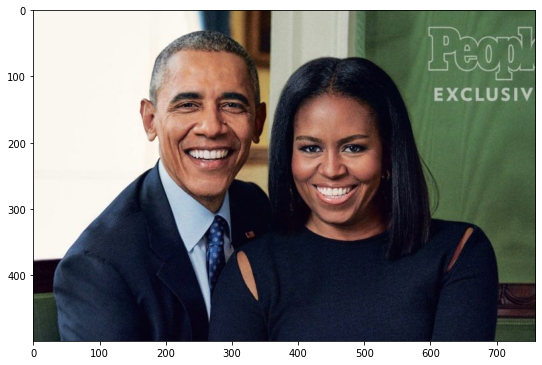

In [11]:
import cv2
image = cv2.imread('images/obamas.jpg')

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(9,9))
plt.imshow(image)

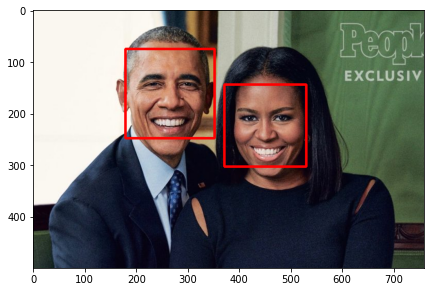

In [12]:
# load in a haar cascade classifier for detecting frontal faces
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# run the detector
# the output here is an array of detections; the corners of each detection box
# if necessary, modify these parameters until you successfully identify every face in a given image
faces = face_cascade.detectMultiScale(image, 1.2, 2)

# make a copy of the original image to plot detections on
image_with_detections = image.copy()

# loop over the detected faces, mark the image where each face is found
for (x,y,w,h) in faces:
    # draw a rectangle around each detected face
    # you may also need to change the width of the rectangle drawn depending on image resolution
    cv2.rectangle(image_with_detections,(x,y),(x+w,y+h),(255,0,0),3) 

fig = plt.figure(figsize=(7,7))

plt.imshow(image_with_detections)

### Load in a trained model


In [13]:
import torch 
from model import Net 

net = Net()
net.load_state_dict(torch.load('keypoints_model_1.pt'))
## print out your net and prepare it for testing
net.eval()

Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop1): Dropout(p=0.1, inplace=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop2): Dropout(p=0.2, inplace=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop3): Dropout(p=0.3, inplace=False)
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop4): Dropout(p=0.4, inplace=False)
  (conv5): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1))
  (pool5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop5): Dropout(p=0.5, inplace=False)
  (fc6): Linear(in_features=12800, out_features=256

### Keypoint detection

we'll loop over each detected face in an image. We will transform those faces in Tensors that your CNN can accept as input images.

1. Convert the face from RGB to grayscale

2. Normalize the grayscale image so that its color range falls in [0,1] instead of [0,255]

3. Rescale the detected face to be the expected square size for your CNN (224x224, suggested)

4. Reshape the numpy image into a torch image.


torch.Size([1, 224, 224])
torch.Size([1, 1, 224, 224])


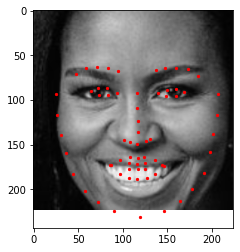

torch.Size([1, 224, 224])
torch.Size([1, 1, 224, 224])


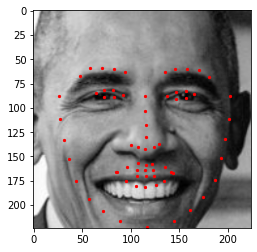

In [16]:
image_copy = np.copy(image)

# loop over the detected faces from your haar cascade
for (x,y,w,h) in faces:
    
    # Select the region of interest that is the face in the image 
    roi = image_copy[y:y+h, x:x+w]
    
    # Convert the face region from RGB to grayscale
    roi = cv2.cvtColor(roi, cv2.COLOR_RGB2GRAY)
    # Normalize the grayscale image so that its color range falls in [0,1] instead of [0,255]
    roi = roi/255.0
    # Rescale the detected face to be the expected square size for your CNN (224x224, suggested)
    size = 224
    roi = cv2.resize(roi, (size, size))
    roi_i = np.copy(roi)
    # Reshape the numpy image shape (H x W x C) into a torch image shape (C x H x W)
    roi = torch.Tensor(np.reshape(roi, (1, roi.shape[0], roi.shape[1])))
    #print(roi.shape)
    roi = torch.unsqueeze(roi, 0)
    #print(roi.shape)
    # Make facial keypoint predictions using your loaded, trained network
    with torch.no_grad():
        key_pts = net(roi)

    key_pts = key_pts.view(key_pts.size()[0], 68, -1)[0].data.numpy()
    key_pts = key_pts*90.0 + 90
    # Display each detected face and the corresponding keypoints        
    plt.imshow(roi_i, cmap='gray')
    plt.scatter(key_pts[:, 0], key_pts[:, 1], s=20, marker='.', c='r')
    #plt.axis('off')
    plt.show()
